<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model Perdiction - Project By Erez Levy-Part III Data Cleansing

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Import tmdb.eda pickel file from my Google Drive Location

In [ ]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eda.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_eda = pickle.load(file)
    print(f"tmdb_eda loaded from {file_path} successfully.")

    #  use the loaded DataFrame (tmdb_eda)
    #  display the first few rows:
    print(tmdb_eda.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_eda loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eda.pkl successfully.
        name          id    number_of_seasons  number_of_episodes  vote_count  \
0          minutes   39280          0                   0               0       
1              man  222976          1                   5               3       
2   erne tur retur  231560          1                  10               0       
3                    34835          1                  12              10       
4             bama   42598          0                   0               0       

   vote_average  adult first_air_date last_air_date  popularity    type    \
0       0.0      False         None           None      0.600    Scripted   
1       7.7      False   2023-05-28     2023-06-25      4.606    Scripted   
2       0.0      False   2014-05-15     2014-07

# 3. Data Cleansing

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming tmdb_eda is your DataFrame

# 1. Using Z-Score:
# Calculate Z-scores for numerical features
numerical_features = tmdb_eda.select_dtypes(include=['number']).columns
z_scores = np.abs(stats.zscore(tmdb_eda[numerical_features]))

# Set a threshold for outlier detection (e.g., 3)
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Remove outliers (optional)
# tmdb_eda = tmdb_eda[(z_scores < threshold).all(axis=1)]

# 2. Using IQR:

# Calculate IQR for numerical features
Q1 = tmdb_eda[numerical_features].quantile(0.25)
Q3 = tmdb_eda[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Set lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = tmdb_eda[((tmdb_eda[numerical_features] < lower_bound) | (tmdb_eda[numerical_features] > upper_bound)).any(axis=1)]

# Remove outliers (optional)
# tmdb_eda = tmdb_eda[~((tmdb_eda[numerical_features] < lower_bound) | (tmdb_eda[numerical_features] > upper_bound)).any(axis=1)]

# 3. Capping Outliers:

# Cap outliers at a certain percentile (e.g., 95th and 5th)
for feature in numerical_features:
    upper_limit = tmdb_eda[feature].quantile(0.95)
    lower_limit = tmdb_eda[feature].quantile(0.05)
    tmdb_eda[feature] = np.clip(tmdb_eda[feature], lower_limit, upper_limit)

# 4. Transformation:

# Apply transformations like log or Box-Cox to reduce the impact of outliers (optional)
# For example, for right-skewed data:

tmdb_eda['popularity'] = np.log(tmdb_eda['popularity'] + 1)  # Add 1 to avoid log(0)

## Using Mathematical Functions



In [ ]:
# Importing scipy stats and zscore libreries
from scipy import stats
from scipy.stats import zscore

#  The tmdb_test 'popularity' Analysis

In [ ]:
import numpy as np
#Initial Results for popularity using z-score
z = np.abs(stats.zscore(tmdb_eda.popularity))
print(z)

0        0.748876
1        0.847949
2        0.748876
3        1.678422
4        0.748876
           ...   
82867    0.092436
82868    0.407415
82869    0.027693
82870    0.363144
82871    0.408633
Name: popularity, Length: 82872, dtype: float64


#  The tmdb_eda Popularity scatterplots

<Axes: xlabel='None', ylabel='popularity'>

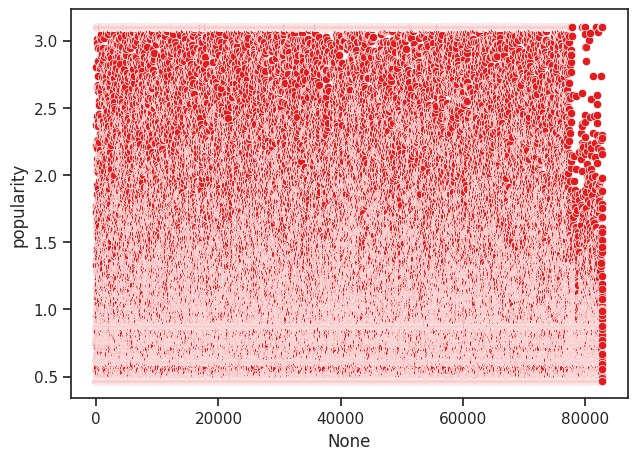

In [ ]:
import seaborn as sns
#  using scatterplots
sns.scatterplot(x=tmdb_eda.index,y=tmdb_eda['popularity'])

# Popularity Z-score for tmdb_eda dataset

In [ ]:
 # Results using z-score
z = np.abs(stats.zscore(tmdb_eda.popularity))
print(z)

0        0.748876
1        0.847949
2        0.748876
3        1.678422
4        0.748876
           ...   
82867    0.092436
82868    0.407415
82869    0.027693
82870    0.363144
82871    0.408633
Name: popularity, Length: 82872, dtype: float64


# Number_of_episodes Analysis

<Axes: xlabel='None', ylabel='number_of_episodes'>

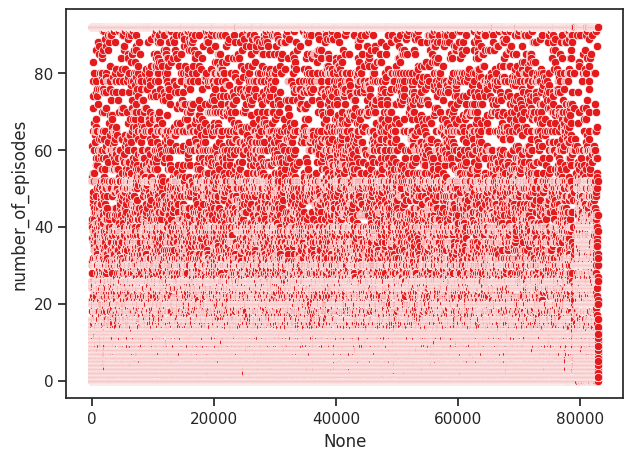

In [ ]:
sns.scatterplot(x=tmdb_eda.index,y=tmdb_eda['number_of_episodes'])

# The Z-score for number_of_episodes' for tmdb_eda  DataFrame



In [ ]:
# Analysis number_of_episodes with TMDB dataset using z-score
z = np.abs(stats.zscore(tmdb_eda.number_of_episodes))
print(z)

0        0.684526
1        0.474689
2        0.264853
3        0.180919
4        0.684526
           ...   
82867    0.348788
82868    0.306820
82869    0.096984
82870    0.306820
82871    0.180919
Name: number_of_episodes, Length: 82872, dtype: float64


# The number_of_seasons Analysis

In [ ]:
# Analysis number_of_seasons Results using z-score
z = np.abs(stats.zscore(tmdb_eda.number_of_seasons))
print(z)

0        1.119475
1        0.067745
2        0.067745
3        0.067745
4        1.119475
           ...   
82867    0.067745
82868    0.067745
82869    0.067745
82870    0.067745
82871    0.067745
Name: number_of_seasons, Length: 82872, dtype: float64


# Scatterplot- number_of_seasons

<Axes: xlabel='None', ylabel='number_of_seasons'>

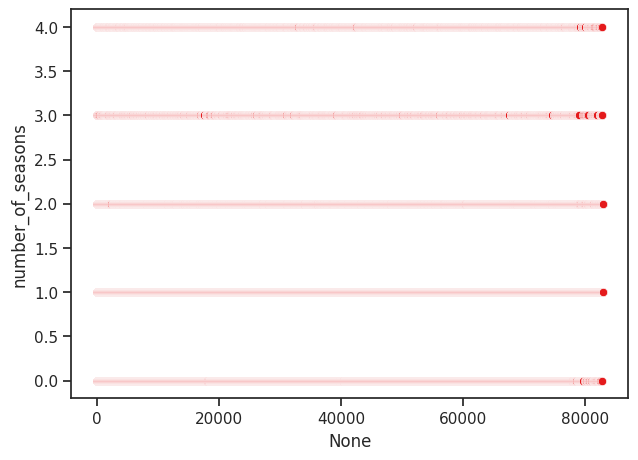

In [ ]:
#  using scatterplots for number_of_seasons
sns.scatterplot(x=tmdb_eda.index,y=tmdb_eda['number_of_seasons'])

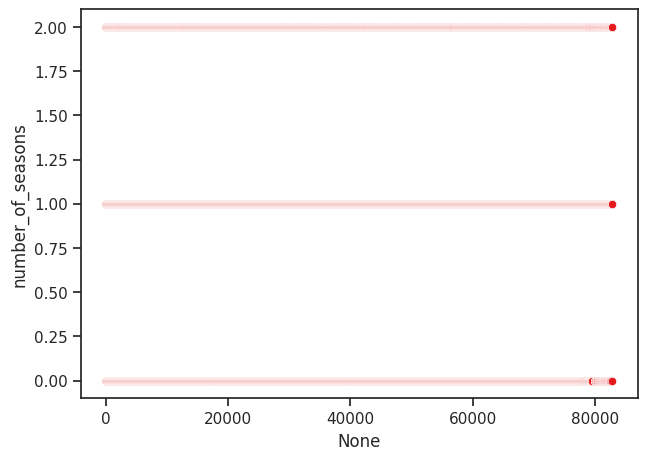

In [ ]:
#number_of_seasons-eliminating those points with TH=2.5
tmdb2 = tmdb_eda.copy()
#2.5 Standart Diviatin from CT
threshold = 3.0
# Recalculate z for the current tmdb2 DataFrame
z = np.abs(stats.zscore(tmdb2.number_of_seasons))  # Recalculate z here
tmdb2 = tmdb2[(z < threshold)]

sns.scatterplot(x=tmdb2.index,y=tmdb2['number_of_seasons'])
tmdb_eda = tmdb2.copy()


# Number_of_seasons Z-score - tmdb_eda DataSet

In [ ]:
# Analysis number_of_seasons with TMDB dataset using z-score
z = np.abs(stats.zscore(tmdb_eda.number_of_seasons))
print(z)

0        1.119475
1        0.067745
2        0.067745
3        0.067745
4        1.119475
           ...   
82867    0.067745
82868    0.067745
82869    0.067745
82870    0.067745
82871    0.067745
Name: number_of_seasons, Length: 82872, dtype: float64


# The vote_count Analysis

In [ ]:
# Analysis vote_count with TMDB dataset using z-score
z = np.abs(stats.zscore(tmdb_eda.vote_count))
print(z)

0        0.423504
1        0.001683
2        0.423504
3        0.982566
4        0.423504
           ...   
82867    0.423504
82868    0.423504
82869    0.001683
82870    0.282897
82871    0.423504
Name: vote_count, Length: 82872, dtype: float64


# Scatterplot for vote_count

<Axes: xlabel='None', ylabel='vote_count'>

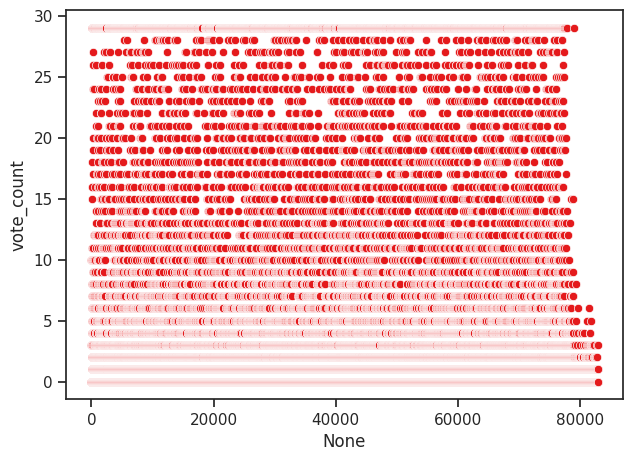

In [ ]:
#  using scatterplots
sns.scatterplot(x=tmdb_eda.index,y=tmdb_eda['vote_count'])

# Z-score vote_count - tmdb_eda dataset

In [ ]:
# Analysis vote_count with TMDB dataset using z-score
z = np.abs(stats.zscore(tmdb_eda.vote_count))
print(z)

0        0.423504
1        0.001683
2        0.423504
3        0.982566
4        0.423504
           ...   
82867    0.423504
82868    0.423504
82869    0.001683
82870    0.282897
82871    0.423504
Name: vote_count, Length: 82872, dtype: float64


# The episode_run_time Analysis

In [ ]:
# Analysis episode_run_time
#Results using z-score
z = np.abs(stats.zscore(tmdb_eda.episode_run_time))
print(z)

0        0.200501
1        1.031072
2        1.045356
3        0.200501
4        1.045356
           ...   
82867    1.045356
82868    1.861644
82869    0.989544
82870    1.045356
82871    1.045356
Name: episode_run_time, Length: 82872, dtype: float64


# Scatterplot episode_run_time

<Axes: xlabel='None', ylabel='episode_run_time'>

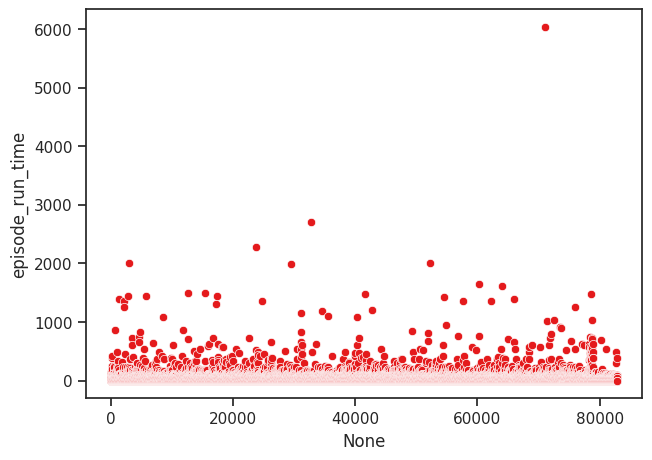

In [ ]:
#  using scatterplots for episode_run_time
sns.scatterplot(x=tmdb_eda.index,y=tmdb_test['episode_run_time'])

In [ ]:
tmdb_eda['episode_run_time']

,episode_run_time
0,30
1,50
2,0
3,30
4,0
...,...
82867,0
82868,70
82869,49
82870,0


# Z-score episode_run_time - tmdb_eda dataset

Indices of outlier rows: []


<Axes: xlabel='None', ylabel='episode_run_time'>

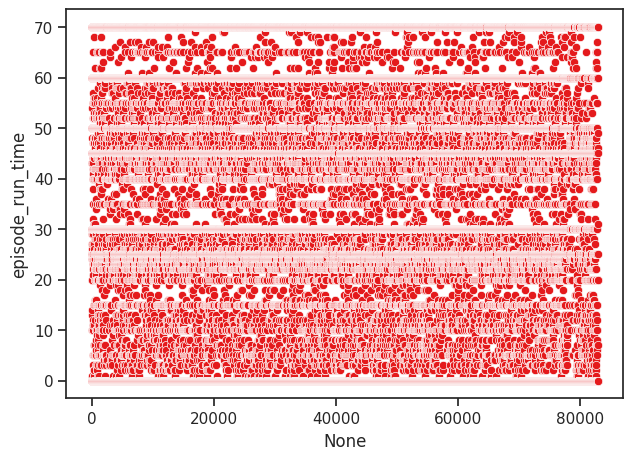

In [ ]:
from scipy import stats
import numpy as np

# Assuming tmdb_eda is the DataFrame

# Calculate Z-scores for 'episode_run_time'
z_scores = np.abs(stats.zscore(tmdb_eda['episode_run_time']))

# Set a threshold for outlier detection (e.g., 3)
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Print the indices of the outlier rows
print("Indices of outlier rows:", outliers[0])

# Option 1: Remove outliers
# tmdb_eda = tmdb_eda[(z_scores < threshold)]

# Option 2: Cap outliers (replace with upper/lower limits)
upper_limit = tmdb_eda['episode_run_time'].mean() + threshold * tmdb_eda['episode_run_time'].std()
lower_limit = tmdb_eda['episode_run_time'].mean() - threshold * tmdb_eda['episode_run_time'].std()
tmdb_eda['episode_run_time'] = np.clip(tmdb_eda['episode_run_time'], lower_limit, upper_limit)

  #  using scatterplots for episode_run_time
sns.scatterplot(x=tmdb_eda.index,y=tmdb_eda['episode_run_time'])

# TMDB Target Values


# Creating Dummies - tmdb_eda 'adult' column

In [ ]:
import pandas as pd

# Assuming tmdb_eda is your DataFrame

tmdb_eda = pd.get_dummies(tmdb_eda, columns=['adult'], prefix=['adult'], drop_first=True)

# Display the modified DataFrame
print(tmdb_eda.head())


        name           id     number_of_seasons  number_of_episodes  \
0          minutes   39280.0          0                   0           
1              man  222838.6          1                   5           
2   erne tur retur  222838.6          1                  10           
3                    34835.0          1                  12           
4             bama   42598.0          0                   0           

   vote_count  vote_average first_air_date last_air_date  popularity  \
0       0           0.0             None           None    0.470004    
1       3           7.7       2023-05-28     2023-06-25    1.723837    
2       0           0.0       2014-05-15     2014-07-17    0.470004    
3      10           6.4       2006-10-06     2006-12-22    2.375928    
4       0           0.0             None           None    0.470004    

     type    genres      created_by     languages   networks   origin_country  \
0  Scripted    None                None      en           N

In [ ]:
tmdb_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  82872 non-null  object 
 1   id                    82872 non-null  float64
 2   number_of_seasons     82872 non-null  int64  
 3   number_of_episodes    82872 non-null  int64  
 4   vote_count            82872 non-null  int64  
 5   vote_average          82872 non-null  float64
 6   first_air_date        62883 non-null  object 
 7   last_air_date         63444 non-null  object 
 8   popularity            82872 non-null  float64
 9   type                  82872 non-null  object 
 10  genres                53402 non-null  object 
 11  created_by            21699 non-null  object 
 12  languages             60084 non-null  object 
 13  networks              54035 non-null  object 
 14  origin_country        69004 non-null  object 
 15  production_companie

# Changing  'first_air_date' & 'last_air_date' to datetime objects & adding Column 'air_time'

In [ ]:
import pandas as pd

# Assuming tmdb_eda is your DataFrame
tmdb_test = tmdb_eda.copy()  # Create a copy to avoid modifying the original DataFrame

# Convert 'first_air_date' and 'last_air_date' to datetime objects
tmdb_test['first_air_date'] = pd.to_datetime(tmdb_test['first_air_date'], errors='coerce')  # errors='coerce' handles invalid dates
tmdb_test['last_air_date'] = pd.to_datetime(tmdb_test['last_air_date'], errors='coerce')

# Calculate the difference and store in a new column 'air_time'
tmdb_test['air_time'] = (tmdb_test['last_air_date'] - tmdb_test['first_air_date']).dt.days
# Updating the tmdb_eda DatFrame with the changes
tmdb_eda = tmdb_test.copy()
# Display the DataFrame to see the changes
print(tmdb_eda[['first_air_date', 'last_air_date', 'air_time']].head())

  first_air_date last_air_date  air_time
0          NaT            NaT      NaN  
1   2023-05-28     2023-06-25     28.0  
2   2014-05-15     2014-07-17     63.0  
3   2006-10-06     2006-12-22     77.0  
4          NaT            NaT      NaN  


# Correlation and other relationship Analysis:
 between different features to identify multicollinearity and feature importance.

In [ ]:
# Assuming tmdb_eda is your DataFrame

# Select boolean columns
bool_cols = tmdb_eda.select_dtypes(include=['bool']).columns

# Convert boolean columns to int64
tmdb_eda[bool_cols] = tmdb_eda[bool_cols].astype(int)

# Verify the changes
tmdb_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  82872 non-null  object        
 1   id                    82872 non-null  float64       
 2   number_of_seasons     82872 non-null  int64         
 3   number_of_episodes    82872 non-null  int64         
 4   vote_count            82872 non-null  int64         
 5   vote_average          82872 non-null  float64       
 6   first_air_date        62883 non-null  datetime64[ns]
 7   last_air_date         63444 non-null  datetime64[ns]
 8   popularity            82872 non-null  float64       
 9   type                  82872 non-null  object        
 10  genres                82872 non-null  object        
 11  created_by            82872 non-null  object        
 12  languages             82872 non-null  object        
 13  networks        

In [ ]:
tmdb_eda.head(3)

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time,adult_True,air_time
0,minutes,39280.0,0,0,0,0.0,NaT,NaT,0.470004,Scripted,Drama,Shotaro Ishinomori,en,other,US,other,30,0,NaN
1,man,222838.6,1,5,3,7.7,2023-05-28,2023-06-25,1.723837,Scripted,Drama,Shuichi Okita,ja,WOWOW Prime,JP,other,50,0,28.0
2,erne tur retur,222838.6,1,10,0,0.0,2014-05-15,2014-07-17,0.470004,Scripted,Drama,Shotaro Ishinomori,en,other,DK,other,0,0,63.0


# Missing Values:
Address missing data through imputation methods (e.g., mean, median, mode) or by removing incomplete records, depending on the context and importance of the missing information.

In [ ]:
print(tmdb_eda.isnull().sum())

name                        0
id                          0
number_of_seasons           0
number_of_episodes          0
vote_count                  0
vote_average                0
first_air_date          19989
last_air_date           19428
popularity                  0
type                        0
genres                      0
created_by                  0
languages                   0
networks                    0
origin_country              0
production_companies        0
episode_run_time            0
adult_True                  0
air_time                20036
dtype: int64


# Plotting the missingness (nullity) matrix

<Axes: >

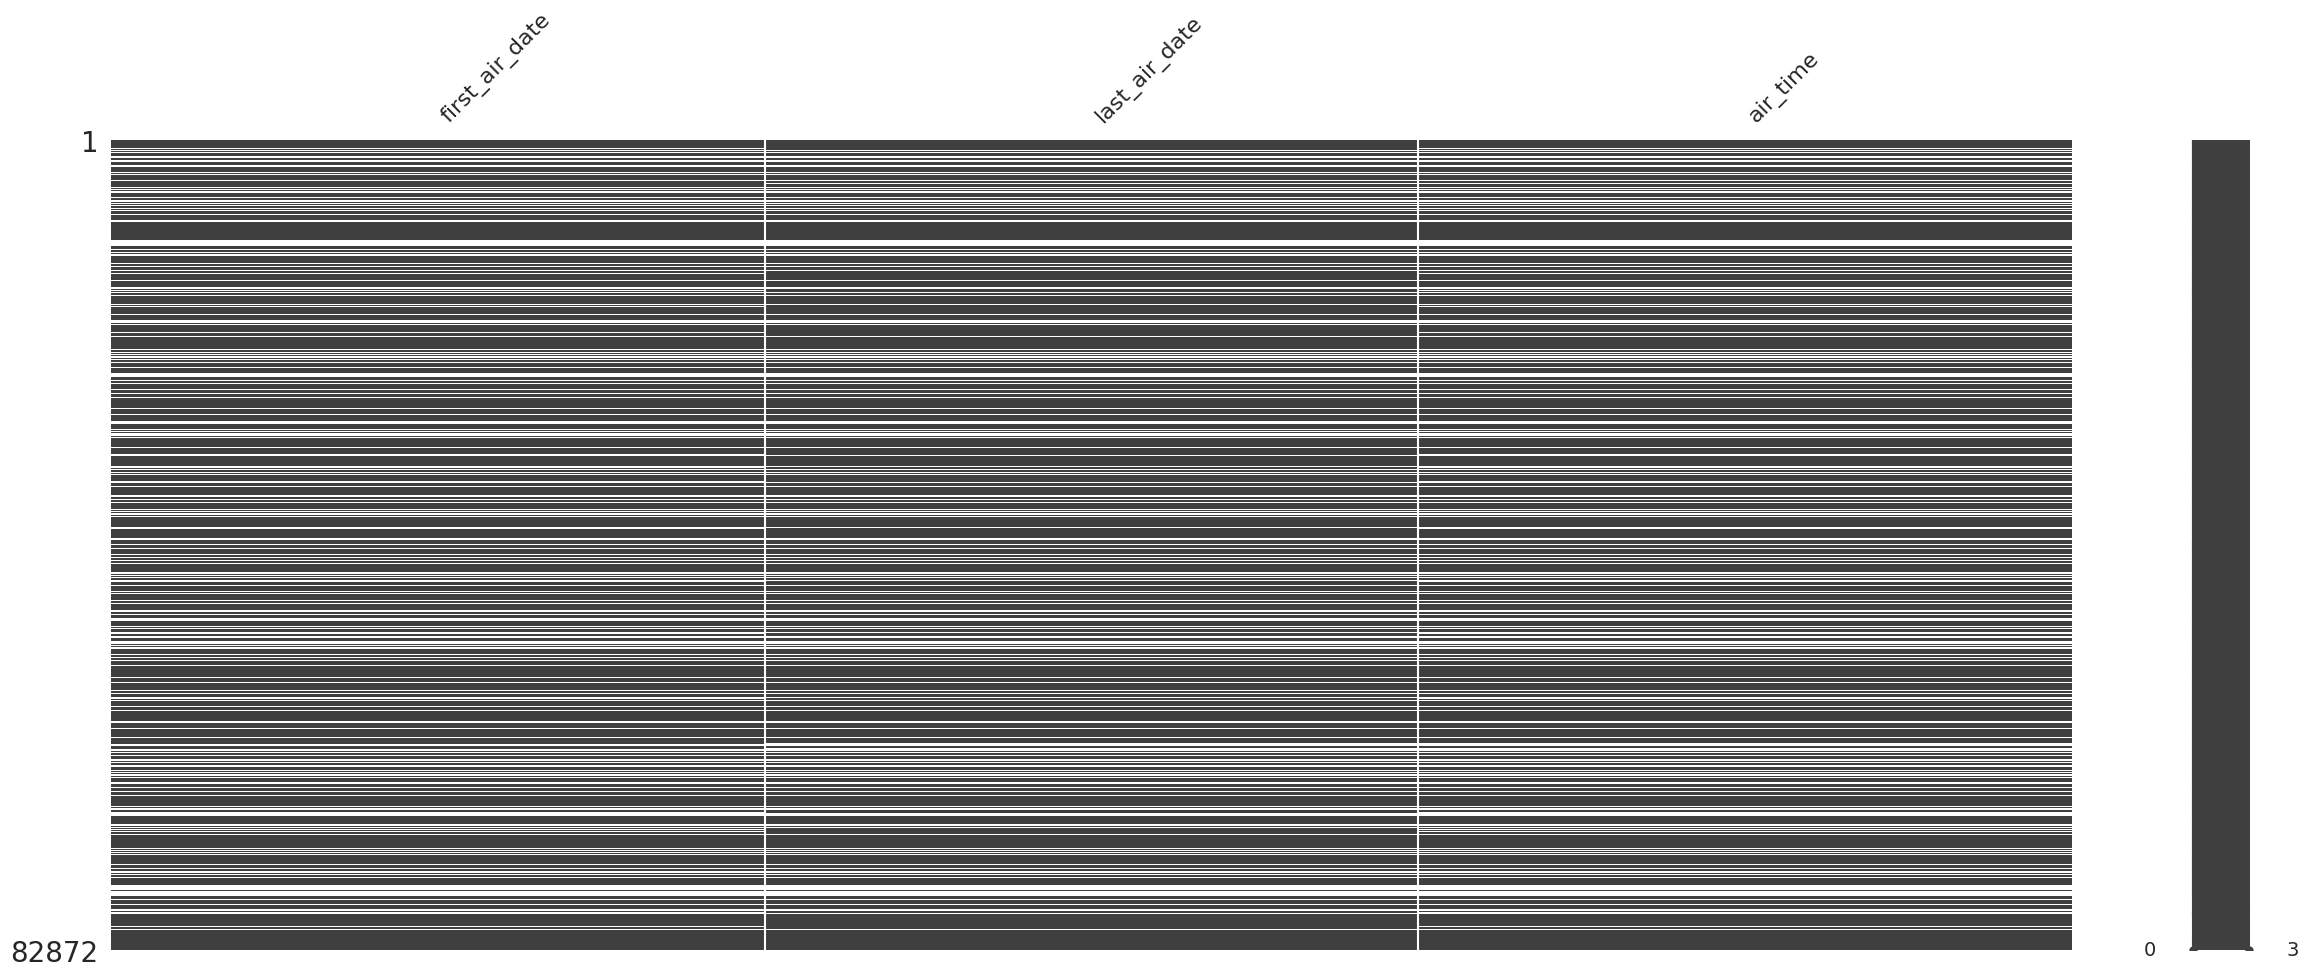

In [ ]:
!pip install missingno
import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = tmdb_eda.columns[tmdb_eda.isnull().any()].tolist()
msno.matrix(tmdb_eda[missingdata_df])

# Missingness Correlation HeatMap

<Axes: >

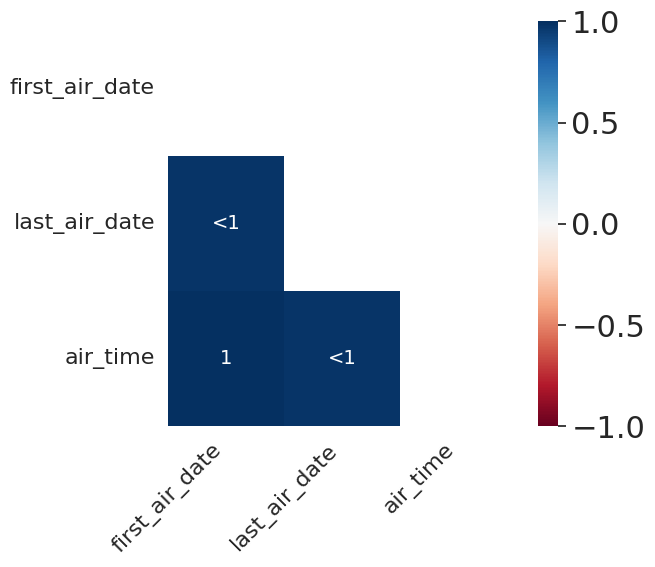

In [ ]:
##Creating the  missingness correlation heatmap
msno.heatmap(tmdb_eda[missingdata_df], figsize=(5,5))

# Missing Values: Imputation Methods.

In [ ]:
import pandas as pd

# Using tmdb_eda as DataFrame

# 1. Check for Missing Values:
print(tmdb_eda.isnull().sum())

# 2. Imputation Methods:
# a. Mean/Median Imputation (for numerical features):

for column in tmdb_eda.select_dtypes(include=['number']).columns:
    if tmdb_eda[column].isnull().any():
        # Use mean if the data is normally distributed, otherwise use median
        if tmdb_eda[column].skew() < 1:  # Check for skewness
            tmdb_eda[column].fillna(tmdb_eda[column].mean(), inplace=True)
        else:
            tmdb_eda[column].fillna(tmdb_eda[column].median(), inplace=True)

# b. Mode Imputation (for categorical features):

for column in tmdb_eda.select_dtypes(include=['object']).columns:
    if tmdb_eda[column].isnull().any():
        tmdb_eda[column].fillna(tmdb_eda[column].mode()[0], inplace=True)

# 3. Removing Incomplete Records (optional):

# If a significant portion of data is missing for certain rows,
# consider removing those rows:
# tmdb_eda.dropna(inplace=True)

# 4. Verify Changes:
print(tmdb_eda.isnull().sum())

name                        0
id                          0
number_of_seasons           0
number_of_episodes          0
vote_count                  0
vote_average                0
first_air_date          19989
last_air_date           19428
popularity                  0
type                        0
genres                      0
created_by                  0
languages                   0
networks                    0
origin_country              0
production_companies        0
episode_run_time            0
adult_True                  0
air_time                20036
dtype: int64
name                        0
id                          0
number_of_seasons           0
number_of_episodes          0
vote_count                  0
vote_average                0
first_air_date          19989
last_air_date           19428
popularity                  0
type                        0
genres                      0
created_by                  0
languages                   0
networks                   

In [ ]:
tmdb_clean=tmdb_eda.copy()

# Download tmdb_clean as pickel file to my Google Drive

In [ ]:
# Import necessary libraries
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_NP DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_clean, file)
  print(f"tmdb_clean saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_eda is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_clean saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl


# Import tmdb_clean as pickel file from my Google Drive

In [ ]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_clean = pickle.load(file)
    print(f"tmdb_clean loaded from {file_path} successfully.")

    #  use the loaded DataFrame (tmdb_eda)
    #  display the first few rows:
    print(tmdb_clean.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_clean loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl successfully.
        name           id     number_of_seasons  number_of_episodes  \
0          minutes   39280.0          0                   0           
1              man  222838.6          1                   5           
2   erne tur retur  222838.6          1                  10           
3                    34835.0          1                  12           
4             bama   42598.0          0                   0           

   vote_count  vote_average first_air_date last_air_date  popularity  \
0       0           0.0              NaT            NaT    0.470004    
1       3           7.7       2023-05-28     2023-06-25    1.723837    
2       0           0.0       2014-05-15     2014-07-17    0.470004    
3      10           6.4       2006-10-06     2